In [35]:
import pandas as pd
%matplotlib inline

In [2]:
df_gdp = pd.read_csv(r'C:\Users\samue\Downloads\world_data.csv')

In [6]:
df = df_gdp.drop(['Indicator Name','Indicator Code','Country Code'], axis = 1)
df_copy = df.copy()

In [4]:
df.head(2)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.49326,26441.619940,26893.011510,28396.90842,28452.170610,29350.805020,30253.279360,NaN,NaN,NaN
1,Africa Eastern and Southern,153.494439,152.873313,162.413188,189.50617,168.816995,187.396306,198.450501,200.001626,212.136595,...,1736.16656,1713.899299,1703.596298,1549.03794,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN


# standardize the values

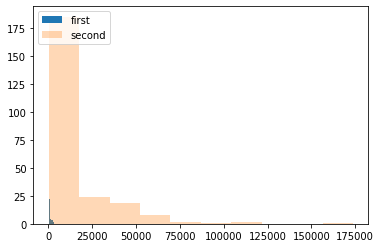

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.hist( df['1960'],  label='first')
ax1.hist( df['2020'],  label='second',alpha = 0.3)
plt.legend(loc='upper left');
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()

In [32]:
x = df[['2020']]
df['2020'] = scaler.fit_transform(x)
df['1960'] = scaler.fit_transform(df[['1960']])

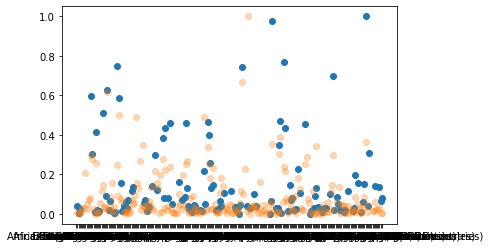

In [43]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x = df['Country Name'], y = df['1960'],  label='first')
ax1.scatter(x = df['Country Name'], y = df['2020'],  label='second',alpha = 0.3)
plt.show()

(array([124.,  45.,  16.,  10.,   9.,   5.,   6.,   9.,   4.,   2.,   5.,
          1.,   0.,   0.,   2.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

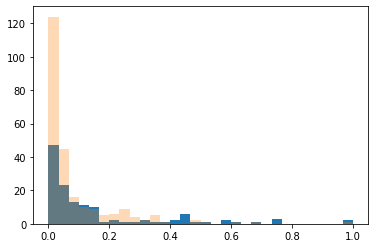

In [45]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.hist(df['1960'], bins=30)
ax1.hist(df['2020'], bins = 30,alpha = 0.3)
plt.le